In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



In [3]:
# Load dataset
df = pd.read_csv("loan_data.csv")


In [5]:
# ---------------------
# 1. EDA (Exploratory Data Analysis)
# ---------------------
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ApplicantIncome  200 non-null    int64 
 1   LoanAmount       200 non-null    int64 
 2   CreditHistory    200 non-null    int64 
 3   Loan_Status      200 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None

Summary Statistics:
       ApplicantIncome  LoanAmount  CreditHistory
count       200.000000  200.000000     200.000000
mean       6133.490000  282.840000       0.695000
std        2419.029427  122.645973       0.461563
min        2034.000000   51.000000       0.000000
25%        4045.500000  179.000000       0.000000
50%        6207.000000  274.000000       1.000000
75%        8286.000000  389.750000       1.000000
max        9989.000000  495.000000       1.000000

Missing Values:
ApplicantIncome    0
LoanAmount         0
CreditHistory      0
Loan_S

C:\Users\DELL\AppData\Local\Temp\ipykernel_4960\767600490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='viridis')


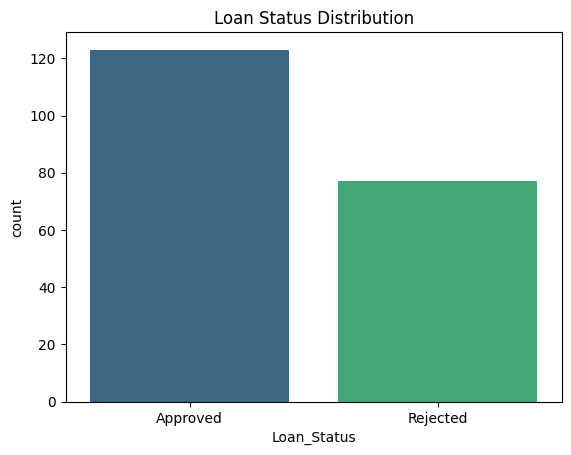

C:\Users\DELL\AppData\Local\Temp\ipykernel_4960\767600490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='coolwarm')


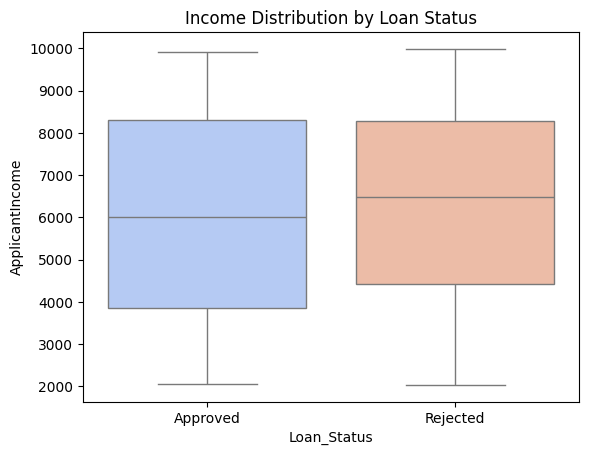

C:\Users\DELL\AppData\Local\Temp\ipykernel_4960\767600490.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='coolwarm')


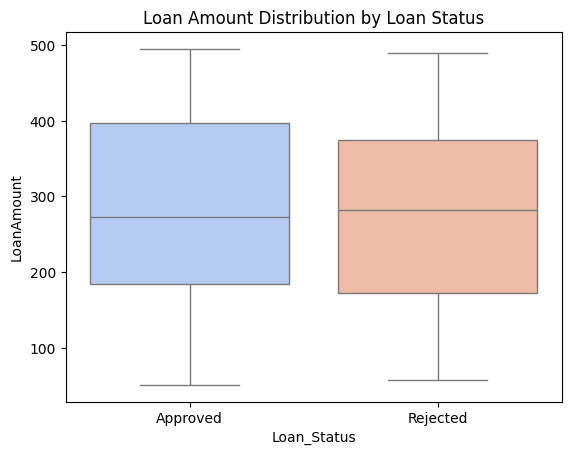

ValueError: could not convert string to float: 'Approved'

In [6]:
# Visualizations
sns.countplot(x='Loan_Status', data=df, palette='viridis')
plt.title("Loan Status Distribution")
plt.show()

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='coolwarm')
plt.title("Income Distribution by Loan Status")
plt.show()

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='coolwarm')
plt.title("Loan Amount Distribution by Loan Status")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# ---------------------
# 2. Preprocessing
# ---------------------
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])  # Encode labels

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[['ApplicantIncome', 'LoanAmount', 'CreditHistory']])

In [8]:
# ---------------------
# 3. KMeans Clustering
# ---------------------
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# ---------------------
# 4. Evaluation
# ---------------------
# Evaluate Clustering using Silhouette Score
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.28


In [10]:
# Map Clusters to Loan Status
cluster_mapping = {
    0: df['Loan_Status'].mode()[0],  # Most common Loan_Status in cluster 0
    1: 1 - df['Loan_Status'].mode()[0]  # Reverse for cluster 1
}
df['Cluster_Label'] = df['Cluster'].map(cluster_mapping)

In [11]:
# Classification Report
print("\nClassification Report:")
print(classification_report(df['Loan_Status'], df['Cluster_Label']))

# ---------------------


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.47      0.54       123
           1       0.39      0.55      0.46        77

    accuracy                           0.50       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.53      0.50      0.51       200



In [12]:
# ---------------------
# 5. Save Model
# ---------------------
with open("loan_kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

print("Model saved successfully!")

Model saved successfully!
